<a href="https://colab.research.google.com/github/Pawan-choudhary/EDA-Case-Study/blob/main/Yulu_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task : The company wants to know:
* Which variables are siginificant in predicting the demand for shared electric cycles in the Indain market?
* How well those variables describe the electric cycles demands

## About Dataset
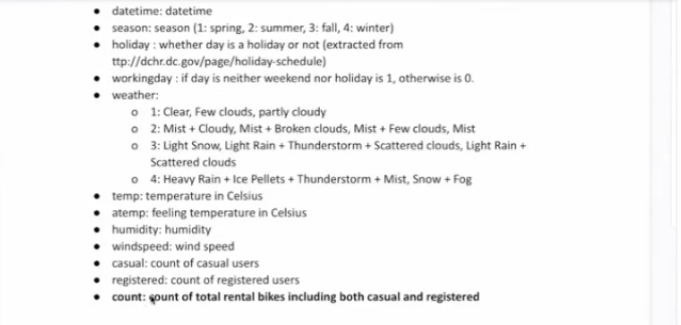

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [ ]:
data = pd.read_csv("/content/bike_sharing.csv")

In [ ]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
data.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [ ]:
data.shape

(10886, 12)

In [ ]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
data.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
data['season'].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [ ]:
data['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

Only 1 row for weather=4, so we can drop this row.

In [ ]:
data['workingday'].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

Insight: Higher number of rents happning on working day. So we make to share there are sufficiant number of cycle on working days due to high demands on working days.

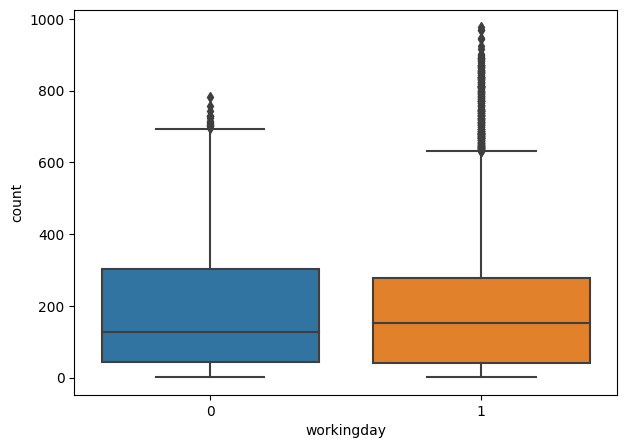

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(x='workingday', y='count', data=data)
plt.show()

## Handling Outliers:
* IQR
* Percentile
* Z-Score
* Isolation Forest
* Local Outlier Factor

In [ ]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
q1 = data['count'].quantile(0.25)
q3 = data['count'].quantile(0.75)
iqr = q3-q1
iqr

242.0

In [ ]:
print("Lower Range: ",q1-(1.5*iqr))
print("Upper Range: ",q3+(1.5*iqr))

Lower Range:  -321.0
Upper Range:  647.0


In [ ]:
data['count'].quantile(0.001)


1.0

In [ ]:
#calculating count values at each percntile 0,10,20,30,40,50,60,70,80,90,100
for i in range(0,100,10):
    var =data["count"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

0 percentile value is 1
10 percentile value is 9
20 percentile value is 28
30 percentile value is 61
40 percentile value is 102
50 percentile value is 145
60 percentile value is 192
70 percentile value is 249
80 percentile value is 328
90 percentile value is 452
100 percentile value is  977


In [ ]:
#calculating count values at each percntile between 90 and 100
for i in range(90,100,1):
    var =data["count"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

90 percentile value is 452
91 percentile value is 470
92 percentile value is 490
93 percentile value is 508
94 percentile value is 537
95 percentile value is 564
96 percentile value is 593
97 percentile value is 638
98 percentile value is 686
99 percentile value is 775
100 percentile value is  977


In [ ]:
#calculating count values at each percntile 99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100
for i in np.arange(0.0, 1.0, 0.1):
    var =data["count"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 775
99.1 percentile value is 788
99.2 percentile value is 800
99.3 percentile value is 812
99.4 percentile value is 822
99.5 percentile value is 835
99.6 percentile value is 846
99.7 percentile value is 858
99.8 percentile value is 872
99.9 percentile value is 894
100 percentile value is  977


In [ ]:
# Removing outliers
data = data[(data['count'] >= 0) & (data['count'] <= (q3+1.5*iqr))]

In [ ]:
data['workingday'].value_counts()

1    7161
0    3425
Name: workingday, dtype: int64

In [ ]:
data.shape

(10586, 12)

<Axes: xlabel='workingday', ylabel='count'>

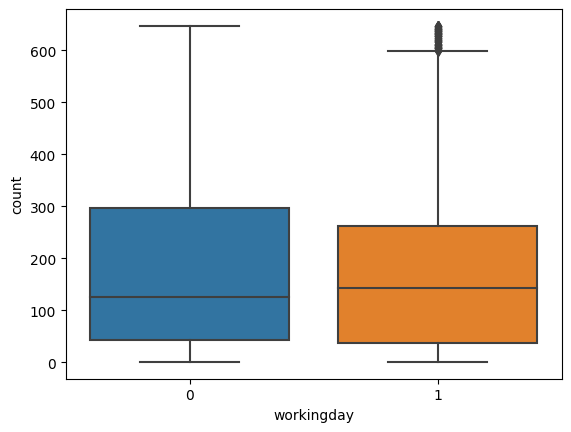

In [ ]:
sns.boxplot(data=data, y='count', x='workingday')

The visual analysis we see that the count doesn't depend much on working days.

Need to check using Statistical methods.

## Hypothesis Testing:
H0 : u1 = u2 (The count on weekday is equal to the count on weekend.)

Ha : u1 > u2 (The count on weekday is greater than count on weekend.)

Population Std is unknown

Significance level alpha = 0.05

### Collecting and Preparing data

In [ ]:
weekday = data[data['workingday']==1]['count'].sample(3425) # To increase the power of analysis it is important to kepp sample size equal
weekend = data[data['workingday']==0]['count'].sample(3425)

In [ ]:
print("The sample standard deviation of the count on weekday is: ", round(weekday.std(),2))
print("The sample standard deviation of the count on weekend is: ", round(weekend.std(),2))

The sample standard deviation of the count on weekday is:  154.06
The sample standard deviation of the count on weekend is:  164.29


As Sample Std. is different, the Population std. dev. may be assumed to be different.

### Calculating p-value

In [ ]:
from scipy.stats import ttest_ind

test_stat, p_value = ttest_ind(weekday, weekend, equal_var=False, alternative='greater') # One Tail test
print("The p_value is :", p_value)

The p_value is : 0.946933240236131


In [ ]:
# print conclusion based on p-value
if p_value < 0.05:
  print(f"As the p-value {p_value} is less than the siginificance level, we reject the Null Hpyothesis H0")
else:
  print(f"As the p-value {p_value} is greater than the siginificance level, we fail reject the Null Hpyothesis")



As the p-value 0.946933240236131 is greater than the siginificance level, we fail reject the Null Hpyothesis


# Does the Demand of electic cycles same for differnet weather?

In [ ]:
data['weather'].value_counts()

1    6965
2    2770
3     850
4       1
Name: weather, dtype: int64

Weather:
1. Clear, Few clouds, partly cloudy
2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3. Light snow, Light Rain, Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4. Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog

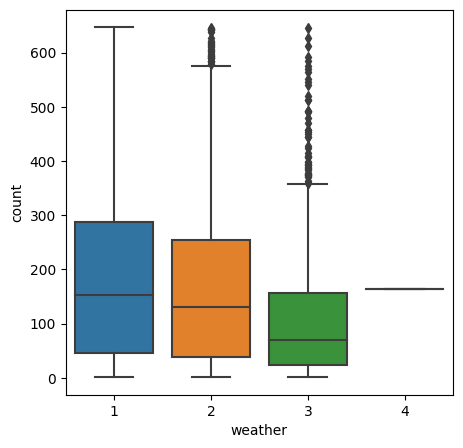

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(data=data, x='weather', y='count')
plt.show()

In [ ]:
data = data[~(data['weather']==4)] # Droping because it has only 1 value

In [ ]:
w1 = data[data['weather']==1]['count'].sample(850)
w2 = data[data['weather']==2]['count'].sample(850)
w3 = data[data['weather']==3]['count'].sample(850)

Note: While equal sample sizes are preferred for parametric tests, non-parametric tests like the Kruskal-Wallis test are more robust to unequal sample sizes. However, it is still beneficial to have similar sample sizes whenever possible to ensure the validity and power of the statistical analysis.

In [ ]:
print(w1.shape)
print(w2.shape)
print(w3.shape)

(850,)
(850,)
(850,)


In [ ]:
data.groupby(['weather'])['count'].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,6965.0,187.329218,161.581066,1.0,45.0,153.0,287.0,647.0
2,2770.0,166.117690,146.992422,1.0,39.0,130.0,254.0,646.0
3,850.0,111.862353,121.233389,1.0,23.0,70.5,157.0,646.0


<Axes: xlabel='count', ylabel='Density'>

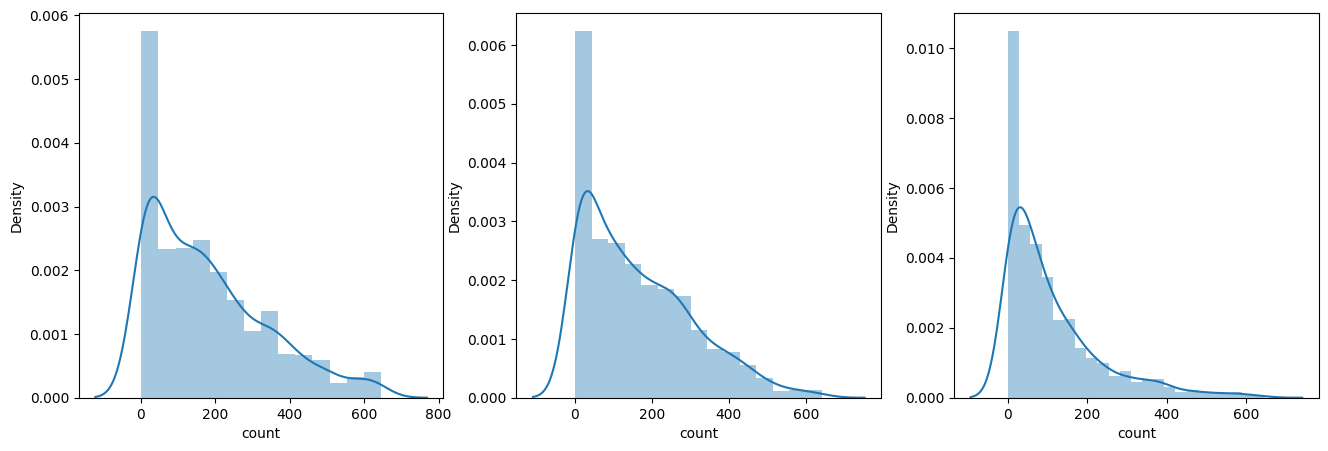

In [ ]:
plt.figure(figsize=(16,5))

plt.subplot(131)
sns.distplot(w1)

plt.subplot(132)
sns.distplot(w2)

plt.subplot(133)
sns.distplot(w3)

**Assumptions for performing ANOVA:**

Independence: The observations within each group should be independent of each other. In other words, the values in one group should not be influenced by or related to the values in other groups.

**Normality**: The data in each group should follow a normal distribution. This assumption is particularly important when the sample sizes are small. However, ANOVA is known to be robust to moderate violations of normality when the sample sizes are large (typically above 30).

Homogeneity of Variances: The variances of the different groups should be approximately equal. This assumption is known as homogeneity of variances or homoscedasticity. It means that the spread or dispersion of the data should be similar across the groups.

Mutual Independence: The observations across different groups should be independent of each other. This assumption is relevant when performing multiple comparisons or post-hoc tests following ANOVA. It ensures that the results of pairwise comparisons are not biased by dependencies between observations.

If these assumptions are violated, it can impact the validity of the ANOVA results. In such cases, alternative tests or modifications to the ANOVA analysis may be necessary. For example, non-parametric tests like the **Kruskal-Wallis test** can be used instead of ANOVA when the assumption of normality is violated.

## Hypothesis Testing:


Significance level alpha = 0.05

### **Step 1: Define null and alternate hypo.**

H0 : u1 = u2 = u3 (The mean count in different weather are equal.)

Ha : u1 != u2 != u3 (The mean count in different weather are different)



### **Step 2: Select Appropriate test**

concerning three population mean, One-way ANOVA could be appropriate. But we have to do check normality for each group and equal variance test.
* For testing normlity, Shapiro-Wilk's test is applied to the reponce variable
* For equality of variance, Levene test is applied to the responce variable

There are various statistical tests available to assess normality, such as the Shapiro-Wilk test, Anderson-Darling test, Kolmogorov-Smirnov test, and graphical methods like Q-Q plots or histograms.

####  Test of normality using Shapiro-Wilk test ,Anderson-Darling test, Kolmogorov-Smirnov test
* H0 : Count follow normal distribution
* Ha : Count doesn't follow  normal distribution

In [ ]:
from scipy.stats import shapiro, anderson, kstest


# Shapiro-Wilk test
shapiro_stat, shapiro_p_value = shapiro(data['count'])
print("Shapiro-Wilk Test Statistic:", shapiro_stat)
print("p-value:", shapiro_p_value)

print("-------------------------------------------------")
# Anderson-Darling test
anderson_stat, critical_values, significance_levels = anderson(data['count'])
print("Anderson-Darling Test Statistic:", anderson_stat)
print("Critical Values:", critical_values)
print("Significance Levels:", significance_levels)

print("-------------------------------------------------")


# Kolmogorov-Smirnov test
ks_stat, ks_p_value = kstest(data['count'], 'norm')
print("Kolmogorov-Smirnov Test Statistic:", ks_stat)
print("p-value:", ks_p_value)


Shapiro-Wilk Test Statistic: 0.901874303817749
p-value: 0.0
-------------------------------------------------
Anderson-Darling Test Statistic: 295.9814632379548
Critical Values: [0.576 0.656 0.787 0.918 1.092]
Significance Levels: [15.  10.   5.   2.5  1. ]
-------------------------------------------------
Kolmogorov-Smirnov Test Statistic: 0.976259927192744
p-value: 0.0


Note: As we can see p_value < 0.05 , so we can say data is not normally distributed.

In [ ]:
# calculating p_value for anderson test
result = anderson(data['count'])
anderson_stat = result.statistic
critical_values = result.critical_values
significance_levels = result.significance_level

# Calculate p-value
p_value = 1 - significance_levels[critical_values >= anderson_stat][0] / 100

print("Anderson-Darling Test Statistic:", anderson_stat)
print("p-value:", p_value)

IndexError: ignored

 The error message "IndexError: index 0 is out of bounds for axis 0 with size 0" suggests that there are no critical values available for the calculated test statistic.

This error can occur if the calculated test statistic is greater than the largest critical value provided by the Anderson-Darling test function. In such cases, the p-value cannot be directly obtained from the significance levels and critical values.

To handle this situation, you can consider the calculated test statistic in comparison to a critical value threshold, or you can use alternative approaches to assess the significance of the test. One option is to use a Monte Carlo simulation or bootstrapping technique to estimate the p-value.

In [ ]:
# Anderson-Darling test
result = anderson(data['count'])
anderson_stat = result.statistic

# Monte Carlo simulation
n_simulations = 1000
simulated_statistics = np.zeros(n_simulations)

for i in range(n_simulations):
    simulated_data = np.random.normal(loc=0, scale=1, size=len(data['count']))
    simulated_result = anderson(simulated_data)
    simulated_statistics[i] = simulated_result.statistic

p_value = np.mean(simulated_statistics >= anderson_stat)

print("Anderson-Darling Test Statistic:", anderson_stat)
print("Estimated p-value (Monte Carlo):", p_value)

Anderson-Darling Test Statistic: 295.9814632379548
Estimated p-value (Monte Carlo): 0.0


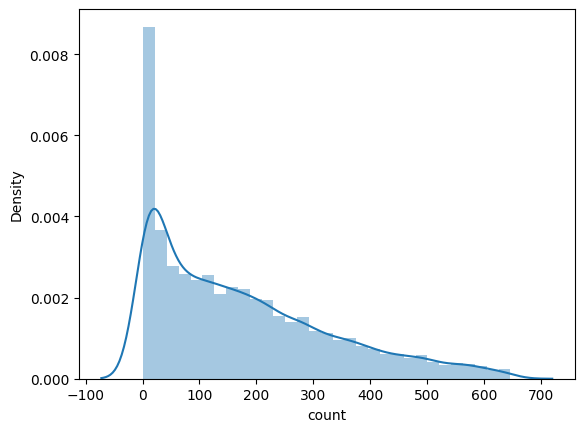

In [ ]:
sns.distplot(data['count'])
plt.show()

#### Trying convert data using log transformation and again applying all test to check normality.

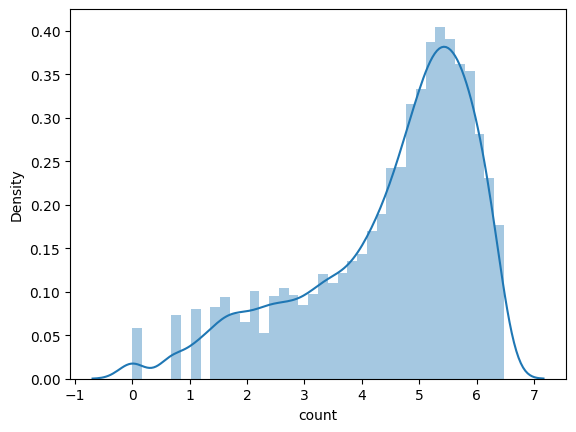

In [ ]:
sns.distplot(np.log(data['count']))
plt.show()

In [ ]:
# checking using normality test
# Shapiro-Wilk test
shapiro_stat, shapiro_p_value = shapiro(np.log(data['count']))
print("Shapiro-Wilk Test Statistic:", shapiro_stat)
print("p-value:", shapiro_p_value)

print("-------------------------------------------------")


# Kolmogorov-Smirnov test
ks_stat, ks_p_value = kstest(np.log(data['count']), 'norm')
print("Kolmogorov-Smirnov Test Statistic:", ks_stat)
print("p-value:", ks_p_value)

Shapiro-Wilk Test Statistic: 0.9054316878318787
p-value: 0.0
-------------------------------------------------
Kolmogorov-Smirnov Test Statistic: 0.8973774034915541
p-value: 0.0


#### Test for equal variance using Levene Test
* H0 : null hypothesis of the test is that the variances in all groups are equal.
* Ha : The alternative hypothesis is that at least one group has a different variance.

In [ ]:
print(w1.var(), w2.var(), w3.var())

25197.122495669646 19934.537170373453 14697.534623432408


In [ ]:
from scipy.stats import levene
levene_stat, p_value =  levene(w1, w2, w3)
print(p_value)
if p_value < 0.05:
  print("Reject Null Hypthesis")
else:
  print("Fail to reject null hypothesis")

1.0984095097755124e-18
Reject Null Hypthesis


Conclusion : So data is not following assumption of ANOVA, so have to go for some other test like Kruskal-Wallis test, Welch's ANOVA etc.

### Kruskal-Wallis Test

The Kruskal-Wallis test is a non-parametric statistical test used to compare the medians of two or more independent groups or samples. It is an extension of the Mann-Whitney U test (Wilcoxon rank-sum test) for comparing two groups to situations involving more than two groups.

The Kruskal-Wallis test is appropriate when the assumptions of normality and equal variances required by parametric tests like the analysis of variance (ANOVA) are violated, or when the data are on an ordinal scale.

Here's an example code snippet in Python using the scipy library to perform the Kruskal-Wallis test:

In [ ]:
from scipy.stats import kruskal
kruskal_stat, p_value = kruskal(w1, w2, w3)
print("p-value : ",p_value)
if p_value < 0.05:
  print("Rject H0")
else:
  print("Fail to reject H0 ")

p-value :  1.6416326903066756e-22
Rject H0


### ANOVA:
Lets try ANOVA also even if its not following assumption of normality and equal variance.

In [ ]:
from scipy.stats import f_oneway

f_stat, p_value = f_oneway(w1, w2, w3)
print("p-value : ",p_value)
if p_value < 0.05:
  print("Rject H0")
else:
  print("Fail to reject H0 ")

p-value :  1.564813456173409e-23
Rject H0


# Interview Question:

Q. If we are comparing more than 2 groups, why it not advisable to use t-test.

Ans. When comparing more than two groups, it is not advisable to use multiple t-tests to compare each pair of groups individually. This approach, known as pairwise t-tests, can lead to an increased risk of Type I error (false positive) and inflated overall significance levels. The more pairwise comparisons you make, the higher the chance of finding a significant difference by chance alone.

The main issue with using multiple t-tests for comparing multiple groups is the problem of multiple comparisons. When conducting multiple tests, the probability of at least one false positive (rejecting the null hypothesis incorrectly) increases. This is known as the family-wise error rate.

To properly handle the comparison of multiple groups, it is recommended to use appropriate statistical methods designed for this purpose. One such method is analysis of variance (ANOVA), which is specifically designed to compare means among multiple groups simultaneously. ANOVA tests the null hypothesis that all group means are equal. If the null hypothesis is rejected, it indicates that at least one group mean is different.

ANOVA has advantages over pairwise t-tests when comparing multiple groups:

Control of Type I error rate: ANOVA provides a global test for comparing means, controlling the overall significance level. It considers all groups simultaneously, reducing the risk of making a false positive claim.

Efficiency: By considering all groups together, ANOVA can provide more precise estimates and higher statistical power compared to conducting multiple individual tests.

Interpretation: ANOVA provides insights into the overall differences among the groups and allows for post-hoc tests (e.g., Tukey's HSD, Bonferroni) to identify specific group differences, if needed.

In summary, when comparing more than two groups, it is generally not advisable to use multiple pairwise t-tests. Instead, ANOVA should be used to assess the overall differences among groups, followed by appropriate post-hoc tests if significant differences are found. ANOVA accounts for the multiple comparisons and provides a more reliable and comprehensive analysis.